Wine Quality Prediction using Linear Regression

In [14]:
# Importing the required libraries to develop the model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Reading the data and Analysis

In [15]:
# Collecting the data for the model to train
data = pd.read_csv("WineQT.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [16]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Data Preprocessing

In [17]:
data = data.drop(['density','Id'],axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   pH                    1143 non-null   float64
 8   sulphates             1143 non-null   float64
 9   alcohol               1143 non-null   float64
 10  quality               1143 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 98.4 KB


In [18]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,4.010000,2.000000,14.900000,8.000000


Data Visualization

<Figure size 1000x1000 with 0 Axes>

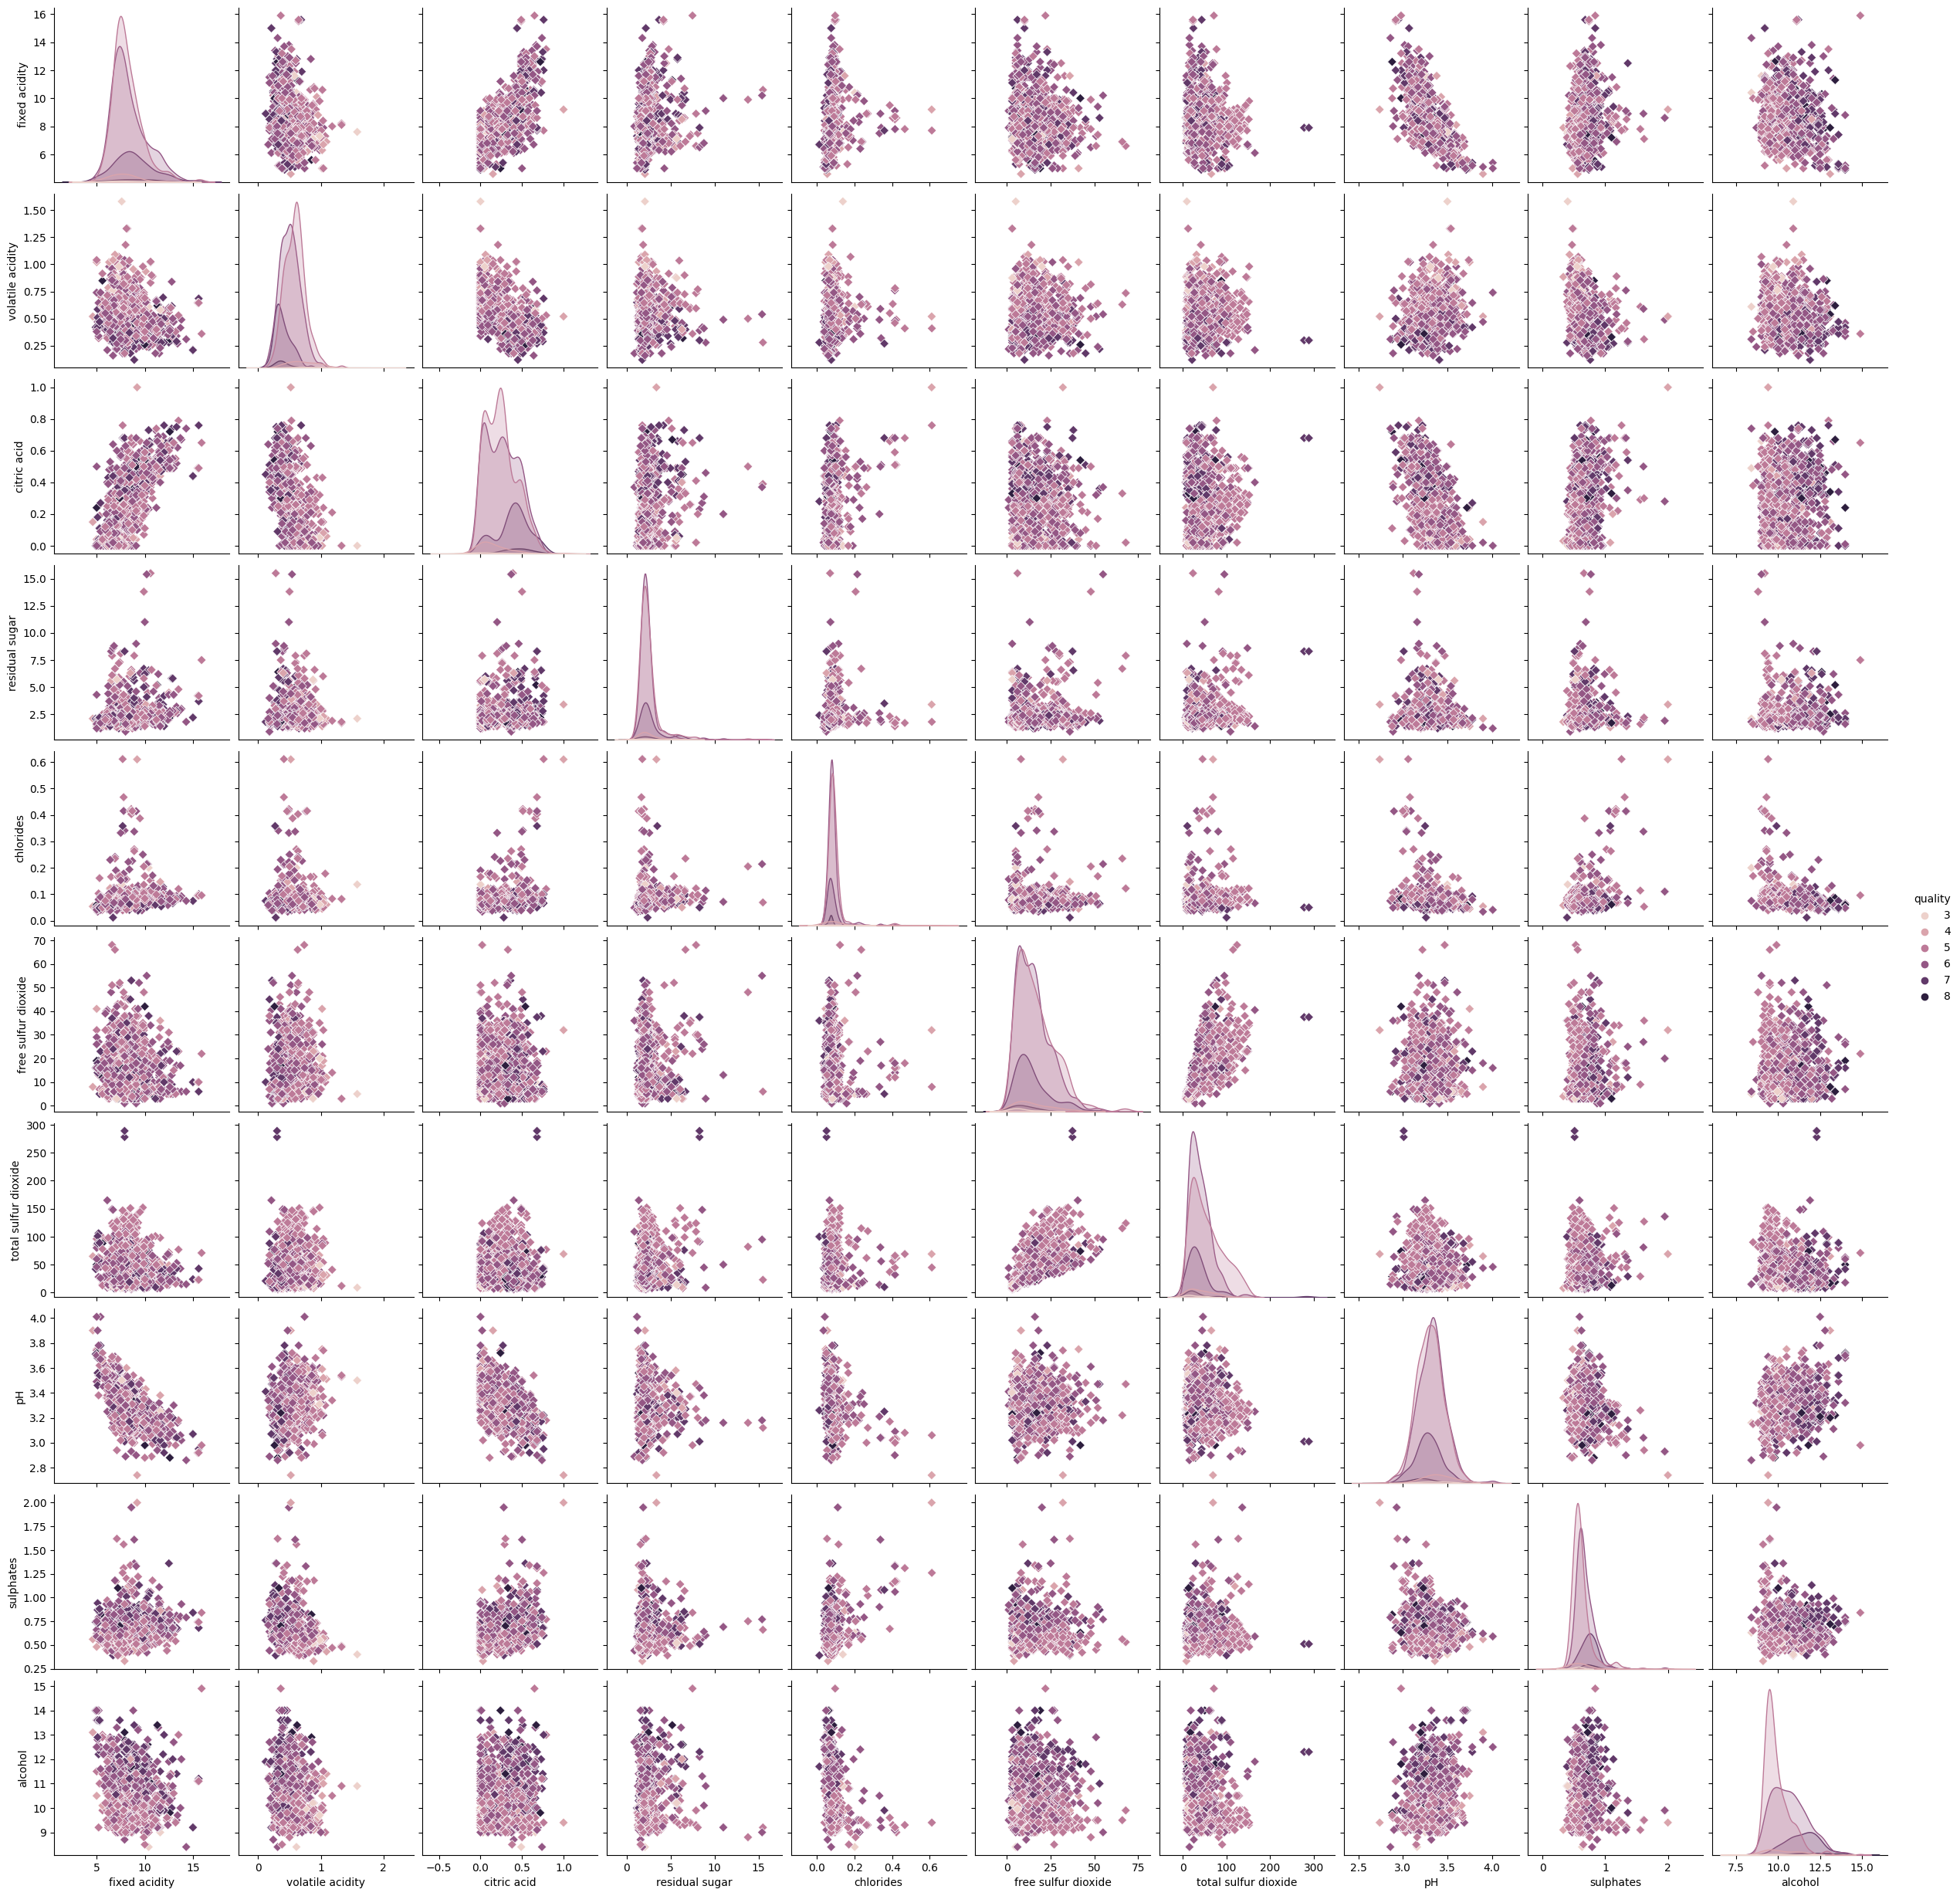

In [20]:
plt.figure(figsize=(10,10))
sb.pairplot(data, hue='quality',markers='D')
plt.show()

Splitting the data set for training and testing

In [21]:
# Splitting the given data into training and testing sets for testing the model
from sklearn.model_selection import train_test_split

x= data.drop("quality", axis=1)
y = data.quality

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
y_test

946    5
142    4
934    6
625    6
124    5
      ..
651    5
122    6
713    7
545    5
568    5
Name: quality, Length: 229, dtype: int64

Training the model

In [22]:
# Importing the Linear Regression from the scikit-learn library
from sklearn.linear_model import LinearRegression

In [23]:
# Training the model with the data by fitting it to the Linear regression model
lin_model = LinearRegression()

lin_model.fit(x_train,y_train)

LinearRegression()

In [24]:
# Printing the predicted values just to re-check
y_pred = lin_model.predict(x_test)
y_pred

array([5.05552184, 5.06072903, 5.35575956, 5.38333366, 5.39276669,
       5.83346197, 5.45822341, 6.03035313, 6.17055404, 6.600086  ,
       4.60361377, 5.97292778, 5.29572438, 5.38270864, 6.2612665 ,
       4.9551308 , 5.63097044, 5.42995741, 4.92047142, 5.01206387,
       6.29082604, 5.17618638, 5.35107865, 5.46447122, 5.14875623,
       5.29283817, 5.37475168, 6.03035313, 5.8281261 , 5.37990471,
       5.27985962, 5.90041609, 5.82244583, 6.17718873, 5.87289785,
       5.42741183, 5.60135172, 5.69735876, 5.1855842 , 5.73022224,
       5.39968486, 6.15734707, 5.47867707, 6.11304106, 5.03225687,
       5.39102885, 5.3370694 , 6.20699919, 6.43998455, 6.04572932,
       5.40177259, 5.99862273, 5.59951544, 6.39964981, 5.41673365,
       5.38090068, 5.49588355, 5.6169056 , 4.43103186, 5.75181662,
       5.57659334, 5.05885077, 5.79022185, 5.31077019, 5.33190646,
       5.31616852, 6.47084536, 5.14146993, 5.49374971, 5.62611986,
       4.8966787 , 5.72270424, 5.57883183, 6.18620574, 6.02373

Testing the model

In [25]:
from sklearn.metrics import r2_score
print('R-squared (R2):', r2_score(y_test, y_pred)*100)

R-squared (R2): 40.80165845433606
